# Decision Trees

In [1]:
from DecisionTree import *

In [2]:
NUM_TRIALS = 500
MIN_FEATURE = 3
MAX_FEATURE = 10

## Entropy cost function (3-10 features)

In [3]:
cost_function = 'Entropy'
feature_to_sensitivity, feature_to_specificity, feature_to_accuracy, feature_to_uar, trees, trees_g = run_trials(NUM_TRIALS, MIN_FEATURE, MAX_FEATURE, cost_function)

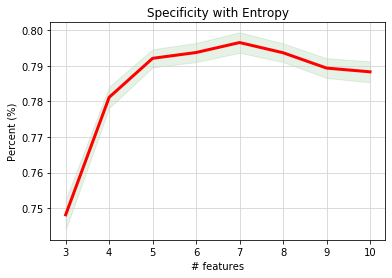

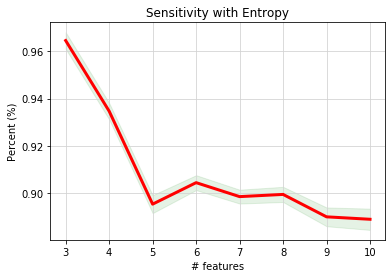

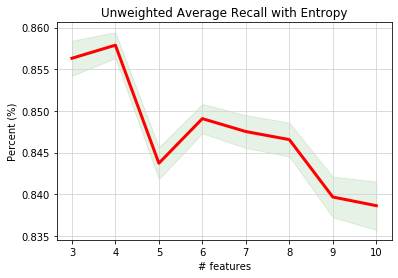

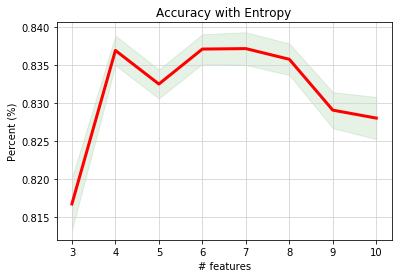

In [4]:
generate_performance_plots(feature_to_sensitivity, feature_to_specificity, feature_to_accuracy, feature_to_uar, cost_function)

## Gini cost function (3-10 features)

In [5]:
cost_function = 'Gini'
feature_to_sensitivity, feature_to_specificity, feature_to_accuracy, feature_to_uar, trees, trees_g = run_trials(NUM_TRIALS, MIN_FEATURE, MAX_FEATURE, cost_function)

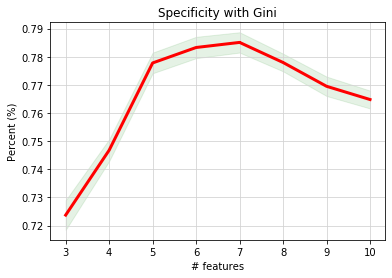

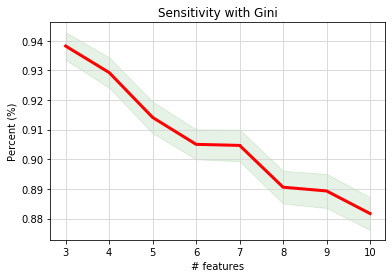

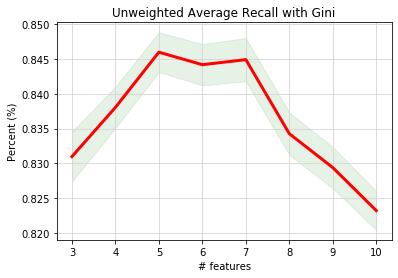

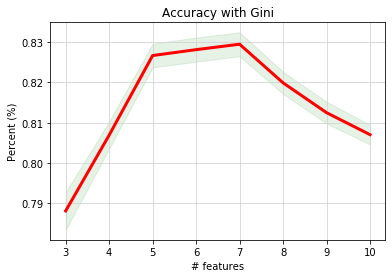

In [6]:
generate_performance_plots(feature_to_sensitivity, feature_to_specificity, feature_to_accuracy, feature_to_uar, cost_function)

## Feature Analysis

In [7]:
NUM_TRIALS = 500
MIN_FEATURE = 30
MAX_FEATURE = 30
# run trials with all features count times features appear inversely weighted to tree depth i.e. 1/2^depth

### Entropy all features analysis

In [8]:
cost_function = 'Entropy'
feature_to_sensitivity, feature_to_specificity, feature_to_accuracy, feature_to_uar, trees, trees_g = run_trials(NUM_TRIALS, MIN_FEATURE, MAX_FEATURE, cost_function, all_features=True)

In [9]:
feature_counts = get_weighted_feature_to_counts(trees)
table = sorted_feature_table(sorted(feature_counts.items(), key=lambda x:x[1], reverse=True))
feature_probs_entropy = get_prob_vector(feature_counts)
print(table)

+---------+-----------------------+
| Feature |      Probability      |
+---------+-----------------------+
|    9    |  0.17567373949609652  |
|    1    |  0.16122053605278183  |
|    10   |  0.12034206341253365  |
|    24   |  0.11267954096244014  |
|    6    |  0.04366381157830058  |
|    22   |  0.040374770615484806 |
|    14   |  0.035302840750796316 |
|    5    |  0.030887383786184143 |
|    15   |  0.030630900553580705 |
|    18   |  0.028879261515299105 |
|    3    |  0.027836172696905574 |
|    7    |  0.023681793314007347 |
|    16   |  0.02318945250758407  |
|    25   |   0.0221384549647687  |
|    8    |  0.02053784355068968  |
|    11   |  0.017521675388042626 |
|    17   |  0.01450240276739773  |
|    20   |  0.013366274795007982 |
|    0    |   0.0115523049393015  |
|    2    |  0.00928673522529837  |
|    23   |  0.00804417870742189  |
|    19   |  0.005730182714414264 |
|    26   |  0.004069461742696928 |
|    29   |  0.004061900047675935 |
|    13   |  0.0039582137986

### Gini all features analysis

In [10]:
cost_function = 'Gini'
feature_to_sensitivity, feature_to_specificity, feature_to_accuracy, feature_to_uar, trees, trees_g = run_trials(NUM_TRIALS, MIN_FEATURE, MAX_FEATURE, cost_function, all_features=True)

In [11]:
feature_counts = get_weighted_feature_to_counts(trees)
table = sorted_feature_table(sorted(feature_counts.items(), key=lambda x:x[1], reverse=True))
feature_probs_gini = get_prob_vector(feature_counts)
print(table)

+---------+-----------------------+
| Feature |      Probability      |
+---------+-----------------------+
|    1    |  0.21105449460083353  |
|    9    |  0.15216459879559055  |
|    10   |  0.12078178694670842  |
|    14   |  0.06652251108589816  |
|    15   |   0.0491491080006458  |
|    22   |  0.04418411113132292  |
|    24   |  0.04165359132931614  |
|    2    |  0.03735129136718493  |
|    6    |  0.02785707912829405  |
|    18   |  0.026963218820016985 |
|    7    |  0.026837004901119458 |
|    5    |  0.025282919750416778 |
|    3    |  0.022740990277640274 |
|    20   |  0.02062512018658892  |
|    0    |  0.019391576425664983 |
|    8    |  0.018992457975698433 |
|    23   |  0.01813884344803716  |
|    11   |  0.01741891670404455  |
|    17   |  0.011293442346933082 |
|    16   |  0.009029693667628711 |
|    12   | 0.0070622614133979975 |
|    25   |  0.006612565369110362 |
|    13   | 0.0037530255333816575 |
|    29   |  0.003279778080433674 |
|    4    |  0.0027736268424

# Random Forests

In [12]:
NUM_TREES = 21
NUM_TRIALS = 40
MIN_FEATURE = 3
MAX_FEATURE = 10

## Uniform Random Forest (3-10 features)

In [13]:
feature_to_sensitivity, feature_to_specificity, feature_to_accuracy, feature_to_uar = random_forest_trials(NUM_TREES, NUM_TRIALS, MIN_FEATURE,MAX_FEATURE)

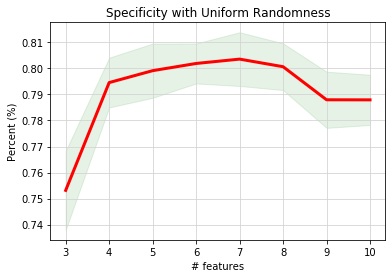

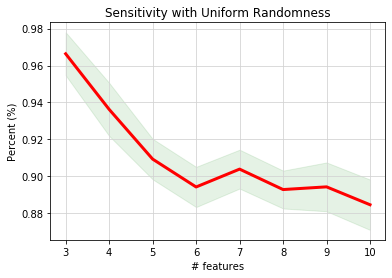

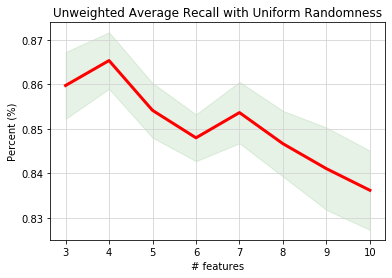

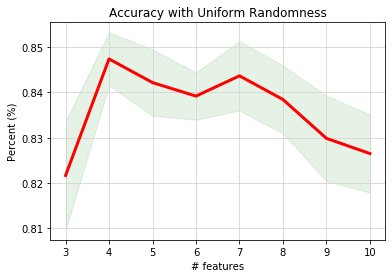

In [14]:
generate_performance_plots(feature_to_sensitivity, feature_to_specificity, feature_to_accuracy, feature_to_uar, cost_function='Uniform Randomness')

## Uniform Random Forest (all features)

In [15]:
NUM_TREES = 41
NUM_TRIALS = 50
MIN_FEATURE = 30
MAX_FEATURE = 30

In [16]:
probabilities = np.ones(30) / 30
cost_function = 'Entropy'
feature_to_sensitivity, feature_to_specificity, feature_to_accuracy, feature_to_uar = random_forest_trials(NUM_TREES, NUM_TRIALS, MIN_FEATURE,MAX_FEATURE, cost_function, probabilities)

In [17]:
print("Mean Sensitivity: %0.4f, 95 Percent Confidence: +- %0.4f" % (np.mean(feature_to_sensitivity[MIN_FEATURE]), confidence_interval_95(feature_to_sensitivity[MIN_FEATURE])))
print("Mean Specificity: %0.4f, 95 Percent Confidence: +- %0.4f" % (np.mean(feature_to_specificity[MIN_FEATURE]), confidence_interval_95(feature_to_specificity[MIN_FEATURE])))
print("Mean Accuracy: %0.4f, 95 Percent Confidence: +- %0.4f" % (np.mean(feature_to_accuracy[MIN_FEATURE]), confidence_interval_95(feature_to_accuracy[MIN_FEATURE])))
print("Mean UAR: %0.4f, 95 Percent Confidence: +- %0.4f" % (np.mean(feature_to_uar[MIN_FEATURE]), confidence_interval_95(feature_to_uar[MIN_FEATURE])))

Mean Sensitivity: 0.9056, 95 Percent Confidence: +- 0.0115
Mean Specificity: 0.8165, 95 Percent Confidence: +- 0.0066
Mean Accuracy: 0.8537, 95 Percent Confidence: +- 0.0070
Mean UAR: 0.8611, 95 Percent Confidence: +- 0.0075


## Entropy Probability Distribution Random Forest (all features)

In [18]:
probabilities = feature_probs_entropy
cost_function = 'Entropy Probability Distribution'
feature_to_sensitivity, feature_to_specificity, feature_to_accuracy, feature_to_uar = random_forest_trials(NUM_TREES, NUM_TRIALS, MIN_FEATURE,MAX_FEATURE, cost_function, probabilities)

In [19]:
print("Mean Sensitivity: %0.4f, 95 Percent Confidence: +- %0.4f" % (np.mean(feature_to_sensitivity[MIN_FEATURE]), confidence_interval_95(feature_to_sensitivity[MIN_FEATURE])))
print("Mean Specificity: %0.4f, 95 Percent Confidence: +- %0.4f" % (np.mean(feature_to_specificity[MIN_FEATURE]), confidence_interval_95(feature_to_specificity[MIN_FEATURE])))
print("Mean Accuracy: %0.4f, 95 Percent Confidence: +- %0.4f" % (np.mean(feature_to_accuracy[MIN_FEATURE]), confidence_interval_95(feature_to_accuracy[MIN_FEATURE])))
print("Mean UAR: %0.4f, 95 Percent Confidence: +- %0.4f" % (np.mean(feature_to_uar[MIN_FEATURE]), confidence_interval_95(feature_to_uar[MIN_FEATURE])))

Mean Sensitivity: 0.9054, 95 Percent Confidence: +- 0.0099
Mean Specificity: 0.8094, 95 Percent Confidence: +- 0.0054
Mean Accuracy: 0.8493, 95 Percent Confidence: +- 0.0057
Mean UAR: 0.8574, 95 Percent Confidence: +- 0.0063


## Gini Probability Distribution Random Forest (all features)

In [20]:
probabilities = feature_probs_gini
cost_function = 'Entropy Probability Distribution'
feature_to_sensitivity, feature_to_specificity, feature_to_accuracy, feature_to_uar = random_forest_trials(NUM_TREES, NUM_TRIALS, MIN_FEATURE,MAX_FEATURE, cost_function, probabilities)

In [21]:
print("Mean Sensitivity: %0.4f, 95 Percent Confidence: +- %0.4f" % (np.mean(feature_to_sensitivity[MIN_FEATURE]), confidence_interval_95(feature_to_sensitivity[MIN_FEATURE])))
print("Mean Specificity: %0.4f, 95 Percent Confidence: +- %0.4f" % (np.mean(feature_to_specificity[MIN_FEATURE]), confidence_interval_95(feature_to_specificity[MIN_FEATURE])))
print("Mean Accuracy: %0.4f, 95 Percent Confidence: +- %0.4f" % (np.mean(feature_to_accuracy[MIN_FEATURE]), confidence_interval_95(feature_to_accuracy[MIN_FEATURE])))
print("Mean UAR: %0.4f, 95 Percent Confidence: +- %0.4f" % (np.mean(feature_to_uar[MIN_FEATURE]), confidence_interval_95(feature_to_uar[MIN_FEATURE])))

Mean Sensitivity: 0.9022, 95 Percent Confidence: +- 0.0118
Mean Specificity: 0.8103, 95 Percent Confidence: +- 0.0054
Mean Accuracy: 0.8487, 95 Percent Confidence: +- 0.0067
Mean UAR: 0.8563, 95 Percent Confidence: +- 0.0075
